In [45]:
import json
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 12})
plt.rcParams['text.latex.preamble'] = ''
plt.rcParams.update({
    "text.usetex": True,
    "font.family": ['Aptos', 'Arial']
})

!mkdir -p insights

In [38]:
cleaned_path = 'outputs/cleaned.jsonl'
omit_path = 'outputs/omit_data.jsonl'
original_path = 'mainpipe_data_v1.jsonl'

In [3]:
def read_jsonl(path):
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            yield json.loads(line)

In [4]:
omit_records = list(read_jsonl(omit_path))

In [5]:
omit_reasons = Counter()

for omit_record in omit_records:
    reason = omit_record['reason']
    omit_reasons[reason] += 1

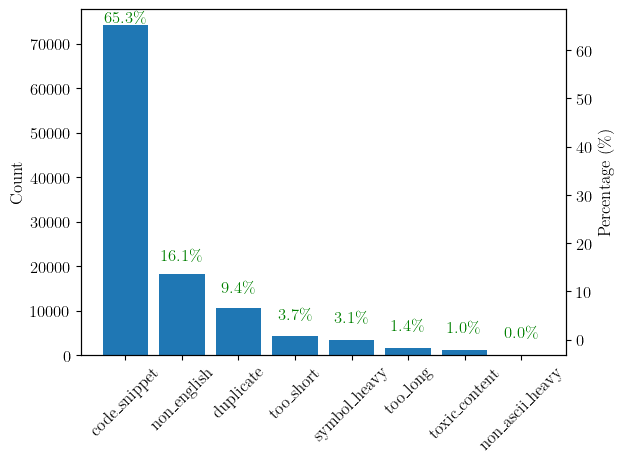

In [44]:
fig, ax = plt.subplots()
sorted_reasons = dict(sorted(omit_reasons.items(), key=lambda item: item[1], reverse=True))
ax.bar(sorted_reasons.keys(), sorted_reasons.values())
ax.tick_params(axis='x', labelrotation=45)
ax.set_ylabel('Count')
ax2 = ax.twinx()

total_omits = sum(sorted_reasons.values())
percentages = [count / total_omits * 100 for count in sorted_reasons.values()]
ax2.plot(sorted_reasons.keys(), percentages, color='orange', marker='o', linestyle='--', label='Percentage')
ax2.lines[0].set_visible(False)
# show percentage values on top of the points
for i, percentage in enumerate(percentages):
    ax2.text(i, percentage + 0.5, f'{percentage:.1f}\\%', color='green', ha='center')
ax2.set_ylabel('Percentage (\\%)')

fig.tight_layout()
plt.savefig('insights/omit-reasons.pdf', bbox_inches='tight')
plt.show()

In [20]:
cleaned_records = list(read_jsonl(cleaned_path))

In [33]:
cleaned_lengths = np.array([len(record['cleaned']) for record in cleaned_records])
omit_lengths = np.array([len(record['original']) for record in omit_records])

In [40]:
original_records = list(read_jsonl(original_path))
original_lengths = np.array([len(record['text']) for record in original_records])
del original_records

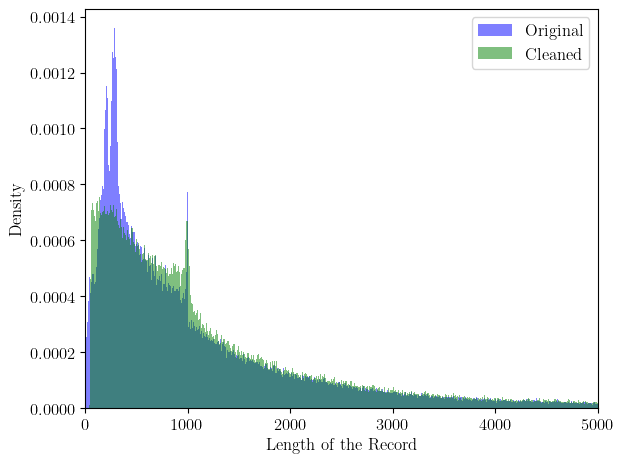

In [41]:
# Plot histogram of cleaned lengths and omit lengths side by side
fig, ax = plt.subplots()
# Define desired bin width
bin_width = 10
min_data = np.min(original_lengths)
max_data = np.max(original_lengths)
bins = np.arange(min_data, max_data + bin_width, bin_width)
ax.hist(original_lengths, bins=bins, alpha=0.5, label='Original', color='blue', density=True)
bin_width = 10
min_data = np.min(cleaned_lengths)
max_data = np.max(cleaned_lengths)
bins = np.arange(min_data, max_data + bin_width, bin_width)
ax.hist(cleaned_lengths, bins=bins, alpha=0.5, label='Cleaned', color='green', density=True)
ax.set_xlabel('Length of the Record')
ax.set_ylabel('Density')
ax.legend()
ax.set_xlim(0, 5000)
fig.tight_layout()
plt.savefig('insights/cleaned-vs-omit-lengths.pdf', bbox_inches='tight')
plt.show()